In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pImpactR as impact

In [2]:
Emit = ['0.64','0.16','0.04','0.01']
y0 = 8
tune0 = 0.76098058 - 0.001
tune1 = 0.23901938 + 0.001
maxTurn = 1.0

In [3]:
beam, lattice = impact.readInputFile('test.original.in');
ke = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency
pDataInit = impact.readParticleData(-111110,ke,mass,freq);

reading ImpactZ input file (test.original.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
Y=[]
N=[]
nMax=[]
i=0
for emit in Emit:
    Y.append(np.load('Yc.mid.'+emit+'mm-mrad.'+str(y0)+'mm.npy'))
    N.append(np.arange(len(Y[i]))*np.sqrt(float(emit)*1.0e-6))
    nMax.append(int(maxTurn/np.sqrt(float(emit)*1.0e-6)))
    i=i+1

for i in range(len(Emit)):
    Y[i]=Y[i]*np.exp(-1j*np.angle(Y[i][0]))

hilbert = np.loadtxt('chad_data.hilbert')
    
print(nMax)
print([len(Y[i]) for i in range(len(Emit))])
print([Y[i][0] for i in range(len(Emit))])

[1250, 2500, 5000, 10000]
[1250, 2500, 5000, 10000]
[(1.2282387493914395+0j), (1.2297390798828505+5.551115123125783e-17j), (1.2301713129060308+0j), (1.2303043882598037+5.551115123125783e-17j)]


In [5]:
hilbert.shape

(400, 2)

In [6]:
fftY = []
Tune = []
for i in range(len(Emit)):
    fftY.append(np.fft.fft(Y[i]))
    Tune.append(np.linspace(0,1,len(Y[i])))

# Raw Data

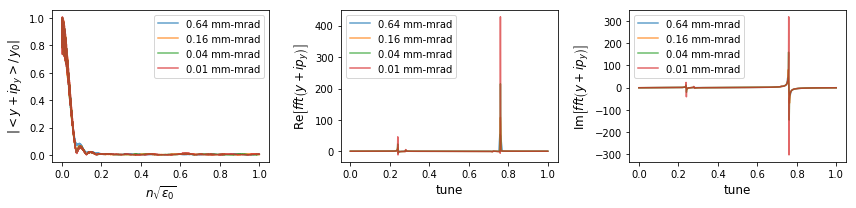

In [7]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
for i in range(len(Emit)):
    plt.plot(N[i][:nMax[i]],np.abs(Y[i][:nMax[i]])/np.abs(Y[i][0]),alpha=0.7)
plt.xlabel(r'$n\sqrt{\epsilon_0}$',fontsize=12);
plt.ylabel(r'$|< y+i p_y > /\,y_0|$',fontsize=12);
legend = [emit + ' mm-mrad' for emit in Emit]
plt.legend(legend)

plt.subplot(1,3,2)
for i in range(len(Emit)):
    plt.plot(Tune[i],np.real(fftY[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Re$\left[fft\left(y+ip_y \right)\right]$',fontsize=12);
plt.legend(legend)

plt.subplot(1,3,3)
for i in range(len(Emit)):
    plt.plot(Tune[i],np.imag(fftY[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Im$\left[fft\left(y+ip_y \right)\right]$',fontsize=12);
plt.legend(legend)

plt.tight_layout()
plt.savefig('Centroid.fft.png',dpi=180,bbox_inches = "tight")

# fft zoom
### near betatron tune at y=y0

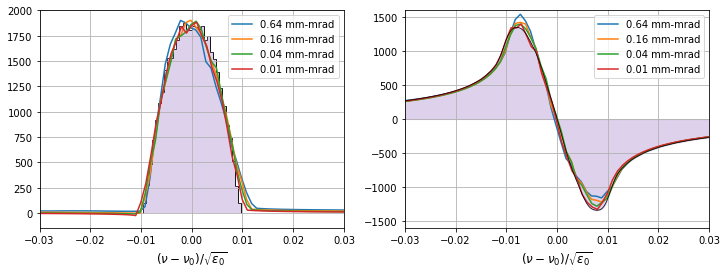

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for i in range(len(Emit)):
    plt.plot((Tune[i]-tune0)/np.sqrt(float(Emit[i])),np.real(fftY[i])*np.sqrt(float(Emit[i]))*4.4e1)
plt.hist((pDataInit[:,2]-0.008)*2.5,bins=32,alpha=0.9,histtype ='step',color='k');
plt.hist((pDataInit[:,2]-0.008)*2.5,bins=32,alpha=0.3,histtype ='bar');
plt.xlim(-0.03,0.03)
plt.xlabel(r'$(\nu-\nu_0)/\sqrt{\epsilon_0}$',fontsize=12);
plt.legend(legend)
plt.grid()
plt.subplot(1,2,2)
for i in range(len(Emit)):
    plt.plot((Tune[i]-tune0)/np.sqrt(float(Emit[i])),np.imag(fftY[i])*np.sqrt(float(Emit[i]))*4.4e1)
plt.plot(hilbert[:,0]*0.0045,-hilbert[:,1]*5.5e3,color='k',alpha=0.9,linewidth=0.8)
plt.fill_between(hilbert[:,0]*0.0045, 0, -hilbert[:,1]*5.5e3,color='C4',alpha=0.3)
plt.xlim(-0.03,0.03)
plt.ylim(-1600,1600)
plt.xlabel(r'$(\nu-\nu_0)/\sqrt{\epsilon_0}$',fontsize=12);
plt.legend(legend)
plt.grid()
plt.savefig('fft.v0.png',dpi=180,bbox_inches = "tight")

In [9]:
ystd=np.std(pDataInit[:,2])
print(ystd)

0.0017167630141380185


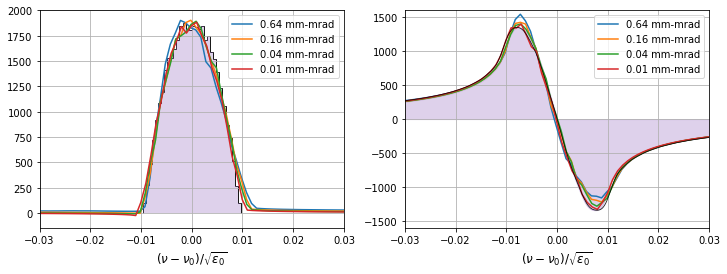

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for i in range(len(Emit)):
    plt.plot((Tune[i]-tune0)/np.sqrt(float(Emit[i])),np.real(fftY[i])*np.sqrt(float(Emit[i]))*4.4e1)
plt.hist((pDataInit[:,2]-0.008)*2.5,bins=32,alpha=0.9,histtype ='step',color='k');
plt.hist((pDataInit[:,2]-0.008)*2.5,bins=32,alpha=0.3,histtype ='bar');
plt.xlim(-0.03,0.03)
plt.xlabel(r'$(\nu-\nu_0)/\sqrt{\epsilon_0}$',fontsize=12);
plt.legend(legend)
plt.grid()
plt.subplot(1,2,2)
for i in range(len(Emit)):
    plt.plot((Tune[i]-tune0)/np.sqrt(float(Emit[i])),np.imag(fftY[i])*np.sqrt(float(Emit[i]))*4.4e1)
plt.plot(hilbert[:,0]*0.0045,-hilbert[:,1]*5.5e3,color='k',alpha=0.9,linewidth=0.8)
plt.fill_between(hilbert[:,0]*ystd*2.5, 0, -hilbert[:,1]*5.5e3,color='C4',alpha=0.3)
plt.xlim(-0.03,0.03)
plt.ylim(-1600,1600)
plt.xlabel(r'$(\nu-\nu_0)/\sqrt{\epsilon_0}$',fontsize=12);
plt.legend(legend)
plt.grid()
plt.savefig('fft.v0.png',dpi=180,bbox_inches = "tight")